<a href="https://colab.research.google.com/github/Avelez164/Data-Science-Big-Data/blob/main/Homework8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Names:

*   Antonio Velez
*   Farren Tanudjaja

# 1.

What would the 1-Nearest Neighbor approach predict is the class when the feature set is {Soymilk, Apple, Eggs} and the following data is used as the training data (same table as the classwork)? Use the Jaccard similarity to calculate neighbors. Show your calculations. (Note: do NOT write any code for this problem. The answers are to be computed by hand.)

|    |Feature Set                     |	Class         |
|----|--------------------------------|---------------|
|A   |{Apple, Banana, Soymilk, Yogurt}|Vegetarian     |
|B   |{Apple, Peanuts, Yogurt}        |Vegetarian     |
|C   |{Tomatoes, Potatoes, Yogurt}    |Non-Vegetarian |
|D   |{Apple, Tomatoes, Potatoes}     |Non-Vegetarian |




|    |Feature Set                     |	Class         |
|----|--------------------------------|---------------|
|A   |{Apple, Banana, Soymilk, Yogurt}|Vegetarian     |
|B   |{Apple, Peanuts, Yogurt}        |Vegetarian     |
|C   |{Tomatoes, Potatoes, Yogurt}    |Non-Vegetarian |
|D   |{Apple, Tomatoes, Potatoes}     |Non-Vegetarian |

# Set A:
Intersection -> {'Apple', 'Soymilk'} -> 2

Union: {'Apple', 'Banana', 'Soymilk', 'Yoghurt', 'Eggs'} -> 5

Jaccard = 2/5 = 0.4

# Set B:
Intersection -> {'Apple'} -> 1

Union: {'Apple', 'Banana', 'Soymilk', 'Yoghurt', 'Eggs'} -> 5

Jaccard = 1/5 = 0.2

# Set C:
Intersection -> {} -> 0

Union: {'Soymilk', 'Apple', 'Eggs', 'Tomatoes', 'Potatoes', 'Yoghurt'} -> 6

Jaccard = 0/6 = 0

# Set D:
Intersection -> {'Apple'} -> 1

Union: {'Soymilk', 'Apple', 'Eggs', 'Tomatoes', 'Potatoes'} -> 5

Jaccard = 1/5 = 0.2

The predicted class would be vegetarian.

In [ ]:
# Code Answer check
training_data = [
    (set('Apple, Banana, Soymilk, Yoghurt'.split(', ')), 'Vegetarian'),
    (set('Apple, Peanuts, Yoghurt'.split(', ')), 'Vegetarian'),
    (set('Tomatoes, Potatoes, Yoghurt'.split(', ')), 'Non-Vegetarian'),
    (set('Apple, Tomatoes, Potatoes'.split(', ')), 'Non-Vegetarian')
]

test_set = set('Soymilk, Apple, Eggs'.split(', '))

jaccard = lambda a, b: len(a & b) / len(a | b)

similarities = [(jaccard(test_set, features), label) for features, label in training_data]

for i, (sim, label) in enumerate(similarities):
    print(f"Similarity with {chr(65+i)} ({label}): {sim:.4f}")

print("\nPredicted class:", max(similarities)[1])


Similarity with A (Vegetarian): 0.4000
Similarity with B (Vegetarian): 0.2000
Similarity with C (Non-Vegetarian): 0.0000
Similarity with D (Non-Vegetarian): 0.2000

Predicted class: Vegetarian


#2.
Consider the following dataset. (Note: do NOT write any code for this problem. The answers are to be computed by hand and marked on the graph. You can visually guess some of the answers.)

|        |     |	   |     |     |    |      |
|----    |-----|-----|-----|-----|----|------|
| Length | 120 | 140 | 130 | 170 | 160 | 180 |
| Width  | 60  | 70  | 80  | 40  | 30  | 20  |


a) Mark the data points on the graph below (use ‘+’ to indicate each point).


Downloading...
From: https://drive.google.com/uc?id=1hTIP69ppDNAywhIGycYKcjSYuwnOPQCx
To: /content/Graph.png
100%|██████████| 32.4k/32.4k [00:00<00:00, 30.8MB/s]


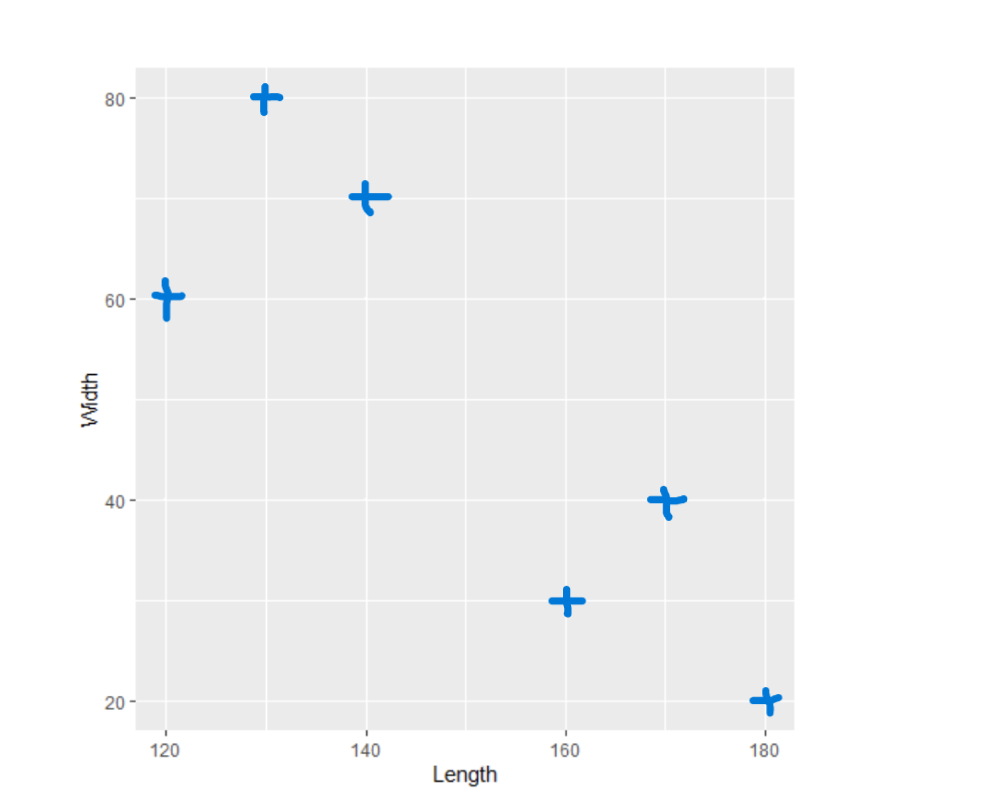

In [ ]:
# Made the markings on the Graph to saved into drive to load here
!pip install -q gdown
import gdown

url = "https://drive.google.com/uc?id=1hTIP69ppDNAywhIGycYKcjSYuwnOPQCx"
output = "Graph.png"
gdown.download(url, output, quiet=False)

from IPython.display import Image, display
display(Image(filename="Graph.png"))


b) Let k=2. Let one of the two initial centers be (Length=120, Width=60). Select the second center using the Farthest Distance Heuristic. Indicate the two centers on the graph (circle the centers).


Distance from Initial: (120,60)
$$
distance = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}
$$

To: (140,70)
$$
distance = \sqrt{(20)^2 + (10)^2} ≈ 22.36
$$

To: (130,80)
$$
distance = \sqrt{(10)^2 + (20)^2} ≈ 22.36
$$

To: (160,30)
$$
distance = \sqrt{(40)^2 + (30)^2} ≈ 50
$$

To: (170,40)
$$
distance = \sqrt{(50)^2 + (20)^2} ≈ 53.85
$$

To: (180,20)
$$
distance = \sqrt{(60)^2 + (40)^2} ≈72.11
$$

**The farthest point is (180,20)**

c) Recompute the centers after the first iteration of the k-means algorithm.

New center 1:____________

New center 2:____________

Indicate the two new centers on the graph (mark new centers with squares).




*   Center 1: (120,60)
*   Center 2: (180,20)

| Points   | d(C1: 120,60) | d(C2: 180,20) | Cluster |
|----------|---------------|---------------|---------|
| (120,60) | 0             | 72.11         | C1      |
| (130,80) | 22.36         | 67.08         | C1      |
| (140,70) | 22.36         | 58.31         | C1      |
| (160,30) | 50            | 28.28         | C2      |
| (170,40) | 53.85         | 22.36         | C2      |
| (180,20) | 72.11         | 0             | C2      |

C1: (120,60), (130,80), (140,70)

Length = (120+130+140)/3 = 390/3 = 130

Width = (60+80+70)/3 = 70

      New Center:1 = (130, 70)

C2 cluster: (160,30), (170,40), (180,20)

Length: (160+170+180)/3 = 510/3 = 170

Width: (30+40+20)/3 = 30

      New Center:2 = (170, 30)



d) What are the two clusters after this first iteration? Draw two ovals, each containing all the points in one cluster in the graph above.


Downloading...
From: https://drive.google.com/uc?id=1C5APcJOiKPrtVklUGxd9qxpD5SLZAXwb
To: /content/Graph_PartD.png
100%|██████████| 65.5k/65.5k [00:00<00:00, 65.9MB/s]


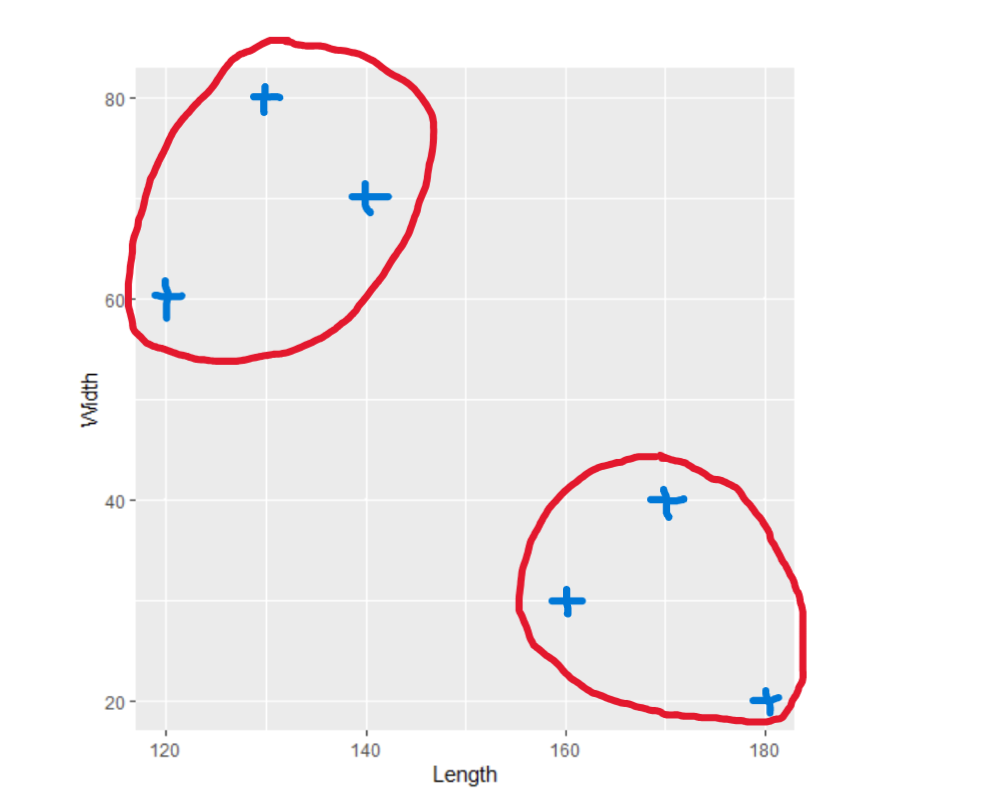

In [ ]:
# Made the ovals on the Graph to saved into drive to load here

url = "https://drive.google.com/uc?id=1C5APcJOiKPrtVklUGxd9qxpD5SLZAXwb"
output = "Graph_PartD.png"

gdown.download(url, output, quiet=False)

# Display the image
from IPython.display import Image, display
display(Image(filename="Graph_PartD.png"))


e) Will the k-means algorithm terminate after this first iteration or will it continue? Answer in 1-2 sentences.



**No, it won't terminate yet because the centers changed from (120, 60) and (180, 20) to (130, 70) and (170, 30). So the algorithm will continue to the next iteration to check if assignments change.**

f) If a new point (Length=140, Width=60) is given, to which cluster will it belong?



To (130, 70):
$$
= \sqrt{(10)^2 + (10)^2} ≈ 14.14
$$

To (170, 30):
$$
= \sqrt{(30)^2 + (30)^2} ≈ 42.43
$$


Closer to (130, 70), it belongs -> Cluster 1



# 3.

 Consider the file breast-cancer-wisconsin.csv (in the K-means clustering; Evaluation metrics module on Canvas) which contains “Features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.” The goal is to cluster the data based on the features to distinguish Benign and Malignant cases.


a) Read the data from the file into an object called “mydata”. Column 1 (“Code”) is the anonymized subject code and will not be used here. Columns 2-10 are the 9 features. Column 11 is the diagnosis: [B]enign or [M]alignant.


    i. How many total cases are there in the data?: ___


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.cluster import KMeans

# fetch dataset
diag = fetch_ucirepo(id=17)
# data (as pandas dataframes)
X = diag.data.features
y = diag.data.targets

kmeans_diag = KMeans(n_clusters=2, n_init=10, random_state=0)
kmeans_diag.fit(X)

# Get cluster labels
diagnosis_labels = kmeans_diag.labels_

X.shape

(569, 30)

    ii. How many [B]enign cases are there in the data?: ___


In [ ]:
diagnosis_counts = pd.Series(diagnosis_labels).value_counts()
print(diagnosis_counts[0])

438


    iii. How many [M]alignant cases are there in the data?: ___


In [ ]:
print(diagnosis_counts[1])

131


b) Run k-means clustering using all the rows and only the following features: ClumpThickness, CellSize, and Nuclei. Use n_init=10.

    i. What should be the value of k? k = ___

The value of k is 2

In [ ]:
from ucimlrepo import fetch_ucirepo

# 1. Fetch the “Original” dataset (id=15)
orig = fetch_ucirepo(id=15)

X = orig.data.features

print("Columns:\n", X.columns.tolist())


Columns:
 ['Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses']


    ii. Give Python code:


In [ ]:
# 1) Fetch the ORIGINAL Wisconsin dataset (id=15)
data = fetch_ucirepo(id=15).data
X = data.features

# Select the desired features:
selected_features = ['Clump_thickness', 'Uniformity_of_cell_size', 'Bare_nuclei']
X_selected = X[selected_features]

# Handle missing values (if any) by replacing '?' with NaN and then imputing
X_selected = X_selected.replace('?', pd.NA).astype(float)
X_selected = X_selected.fillna(X_selected.mean())

# Perform k-means clustering with n_init=10
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
kmeans.fit(X_selected)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame
X['cluster'] = cluster_labels

# Print the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[3.02340426 1.34893617 1.36400112]
 [7.27947598 6.79912664 8.02023567]]


<ipython-input-398-592e642ee691>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = cluster_labels


c) Evaluation: Compare the resulting clusters with the known diagnosis.


i. What is the contingency table of your clustering? (Hint: use the scikit-learn confusion_matrix() function. You can arbitrarily assign cluster 1/2 to Benign/Malignant)

|          |Cluster 1    |	Cluster 2    |
|----------|-------------|---------------|
|Benign    |    356      |       1       |
|Malignant |     82      |      130      |

    ii. Give Python code:

In [ ]:
from sklearn.metrics import confusion_matrix

# Ensure y['Diagnosis'] only contains 'B' and 'M' before mapping
y_true_cleaned = y['Diagnosis'].map({'B': 0, 'M': 1}).dropna()

# Filter diagnosis_labels to match the cleaned y_true
diagnosis_labels_cleaned = diagnosis_labels[y_true_cleaned.index]

# Create the contingency table
contingency_table = confusion_matrix(y_true_cleaned, diagnosis_labels_cleaned)

# Display the contingency table
pd.DataFrame(contingency_table,
                  index=['Actual Benign', 'Actual Malignant'],
                  columns=['Predicted Benign', 'Predicted Malignant'])

,Predicted Benign,Predicted Malignant
Actual Benign,356,1
Actual Malignant,82,130


# 4.
Using the contingency table that you obtained from the previous problem (3.c), calculate the following metrics (consider Malignant as the Positive class):
TP = 82, TN = 1, FP = 356, FN = 130
1. Accuracy: $$(82 + 1) \div 569 = 0.146$$
2. Error: $$(356 + 130) \div 569 = 0.854$$
3. Precision: $$82 \div (82 + 356) = 0.187$$
4. Recall: $$82 \div (82 + 130) = 0.387$$
5. F-score: $$2 \times 0.187 \times 0.387 \div 0.187 + 0.387 = 0.252$$


Consider a “silly” classifier for this problem that makes every prediction as Malignant. Calculate the metrics for this “silly” classifier.

$$ N_B = 356+1=357 $$
$$ N_M = 130+82=212 $$
$$ N Total = 357+212=569 $$


1. Accuracy  (TP+TN/N) $$ (212+0) \div 569 ≈ 0.373 $$
2. Error (FP+FN/N) $$ (357+0) \div 569 ≈ 0.627 $$
3. Precision (TP/TP+FP) $$ (212) \div (212+357) ≈ 0.373 $$
4. Recall (TP/TP+FN) $$ (212) \div (212+0) ≈ 1 $$
5. F-score $$ 2((0.373 \times 1) \div (0.373+1)) ≈ 0.5433 $$


In [ ]:
def colab2pdf():
  # @title Download Notebook in PDF Format{display-mode:'form'}
  !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null;
  import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml,re;locale.setlocale(locale.LC_ALL,'en_US.UTF-8');warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning);
  %matplotlib inline
  def convert(b):
    try:
      s.value='🔄 Converting';b.disabled=True
      n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))
      p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.utcnow().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);nb=nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4)
      u=[u for c in nb.cells if c.get('cell_type')=='markdown' for u in re.findall(r'!\[.*?\]\((https?://.*?)\)',c['source']) if requests.head(u,timeout=5).status_code!=200]
      if u:raise Exception(f"Bad Image URLs: {','.join(u)}")
      nb.cells=[cell for cell in nb.cells if '--Colab2PDF' not in cell.source]
      nb=nbformat.v4.new_notebook(cells=nb.cells or [nbformat.v4.new_code_cell('#')]);nbformat.validator.normalize(nb)
      nbformat.write(nb,(p/f'{n.stem}.ipynb').open('w',encoding='utf-8'))
      with (p/'config.yml').open('w', encoding='utf-8') as f: yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)
      !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
      google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'✅ Downloaded: {n.stem}.pdf'
    except Exception as e:s.value=f'❌ {str(e)}'
    finally:b.disabled=False
  if not pathlib.Path('/usr/local/bin/quarto').exists():
    !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' && dpkg -i quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet && rm quarto-linux-amd64.deb
  b=ipywidgets.widgets.Button(description='⬇️ Download');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))
colab2pdf() # | Colab2PDF v1.6 | https://github.com/drengskapur/colab2pdf | GPL-3.0-or-later |

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>